In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
tickers = ['IGLB', 'HYG', 'SPY', 'MBB','BOTZ','ICLN','PAVE']
yf_etf = yf.Tickers(tickers)

#PAVE는 2018년 부터 자료 있음

df = yf_etf.download(start='2010-01-01')    
df = df['Close']
df

[*********************100%%**********************]  7 of 7 completed


,BOTZ,HYG,ICLN,IGLB,MBB,PAVE,SPY
Date,,,,,,,
2010-01-04,NaN,39.491512,16.686981,27.838366,73.872635,NaN,86.860069
2010-01-05,NaN,39.678890,17.133631,28.129641,74.220901,NaN,87.089989
2010-01-06,NaN,39.781464,17.280064,28.129641,74.220901,NaN,87.151291
2010-01-07,NaN,39.942055,17.316675,28.113138,74.102524,NaN,87.519188
2010-01-08,NaN,40.004494,17.470440,28.102165,74.207001,NaN,87.810455
...,...,...,...,...,...,...,...
2024-03-14,31.559999,77.120003,13.510000,50.730000,91.730003,38.020000,513.354980
2024-03-15,31.650000,77.070000,13.420000,50.820000,91.669998,38.139999,509.829987
2024-03-18,31.870001,77.250000,13.490000,50.639999,91.559998,38.209999,512.859985


In [26]:
# # AI etf 로 BOTZ를 고른 이유: etf들의 움직임이 거의 동일한데 BOTZ의 역사가 가장 길다(from 2016.9)
# tickers = ['IRBO','ROBT','BOTZ']
# yf_etf = yf.Tickers(tickers)
# df = yf_etf.download(start='2010-01-01')
# df = df['Close']
# df

In [3]:
df.ffill(inplace=True)
df = df.resample('W').last() # 시계열 데이터를 주(week) 단위로 리샘플링하고, 각 주의 마지막 데이터를 선택.
df

,BOTZ,HYG,ICLN,IGLB,MBB,PAVE,SPY
Date,,,,,,,
2010-01-10,NaN,40.004494,17.470440,28.102165,74.207001,NaN,87.810455
2010-01-17,NaN,39.736897,16.269623,28.371462,74.569122,NaN,87.097641
2010-01-24,NaN,38.706425,14.644120,28.393465,74.715385,NaN,83.702362
2010-01-31,NaN,38.465527,14.087648,28.173616,74.840729,NaN,82.307411
2010-02-07,NaN,38.188175,13.824051,28.168112,75.067787,NaN,81.747925
...,...,...,...,...,...,...,...
2024-02-25,30.730000,77.349998,13.680000,50.768925,91.508347,37.090000,506.276978
2024-03-03,31.740000,77.180000,14.130000,50.900002,92.059998,37.959999,511.261475
2024-03-10,32.380001,77.400002,14.340000,51.540001,92.930000,38.279999,510.134979


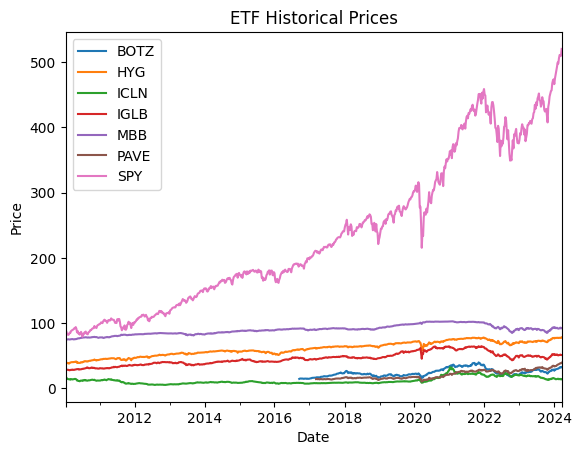

In [4]:
# 시각화
df.plot()
plt.title('ETF Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'best')

Text(0, 0.5, 'Returns')

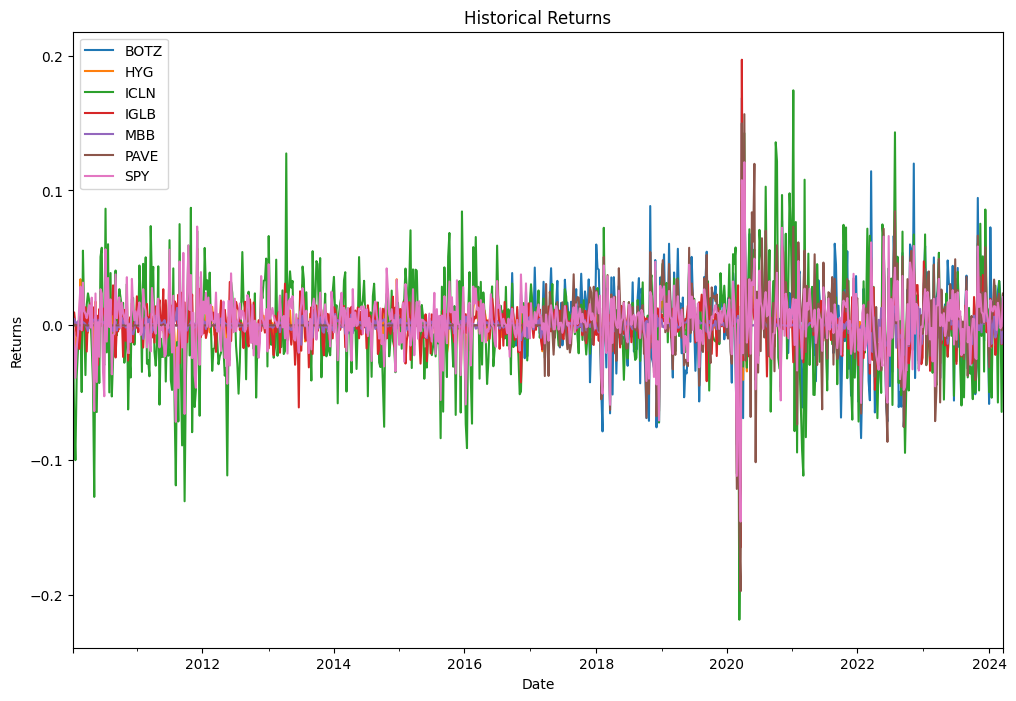

In [6]:
rets = df.pct_change().fillna(0) # 각 컬럼의 백분율 변화율(즉, 퍼센트 변화율)을 계산하고, 결측값(NaN)이 있을 경우 이를 0으로 채움.
rets.plot(figsize=(12,8))
plt.title('Historical Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

Text(0, 0.5, 'Volatility')

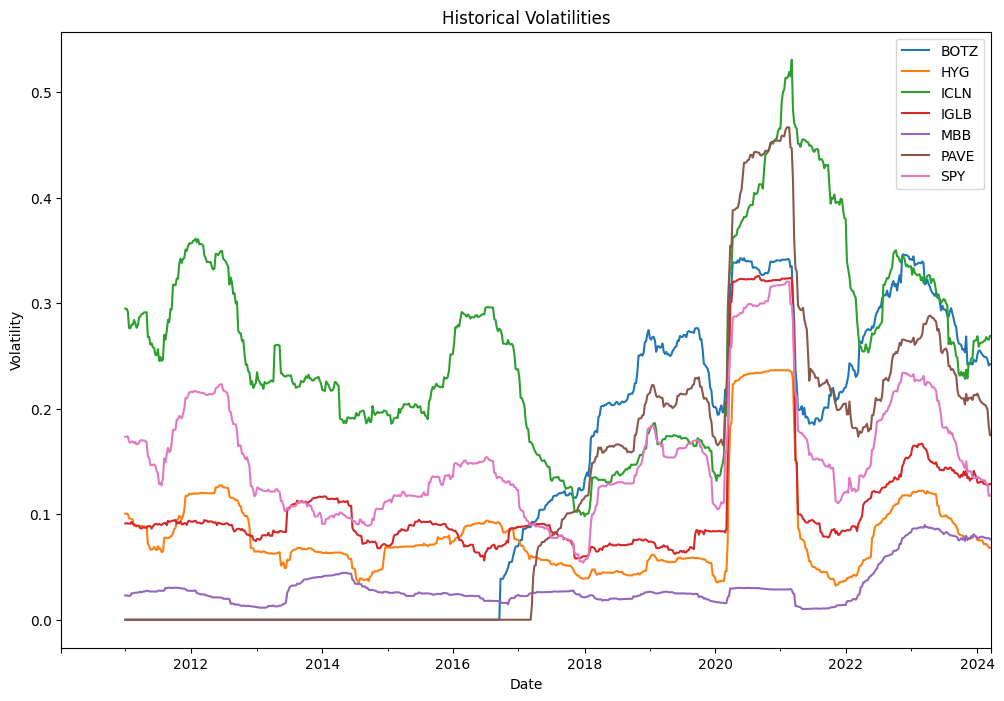

In [7]:
# 변동성 계산
vols = rets.rolling(52).std() * np.sqrt(52) # 이전 52주 동안의 주간 수익률 데이터를 기반으로 한 연간화된 변동성
vols.plot(figsize=(12,8))
plt.title('Historical Volatilities')
plt.xlabel('Date')
plt.ylabel('Volatility')


In [8]:
# 공분산
cov = rets.cov() * 52
cov

,BOTZ,HYG,ICLN,IGLB,MBB,PAVE,SPY
BOTZ,0.034953,0.009752,0.025100,0.009699,0.001974,0.025492,0.019895
HYG,0.009752,0.009225,0.015723,0.006852,0.001100,0.010415,0.012095
ICLN,0.025100,0.015723,0.077807,0.008090,0.001872,0.024670,0.030854
IGLB,0.009699,0.006852,0.008090,0.016029,0.003116,0.008688,0.005807
MBB,0.001974,0.001100,0.001872,0.003116,0.001513,0.001312,0.000848
PAVE,0.025492,0.010415,0.024670,0.008688,0.001312,0.031828,0.019956
SPY,0.019895,0.012095,0.030854,0.005807,0.000848,0.019956,0.026650


<Axes: >

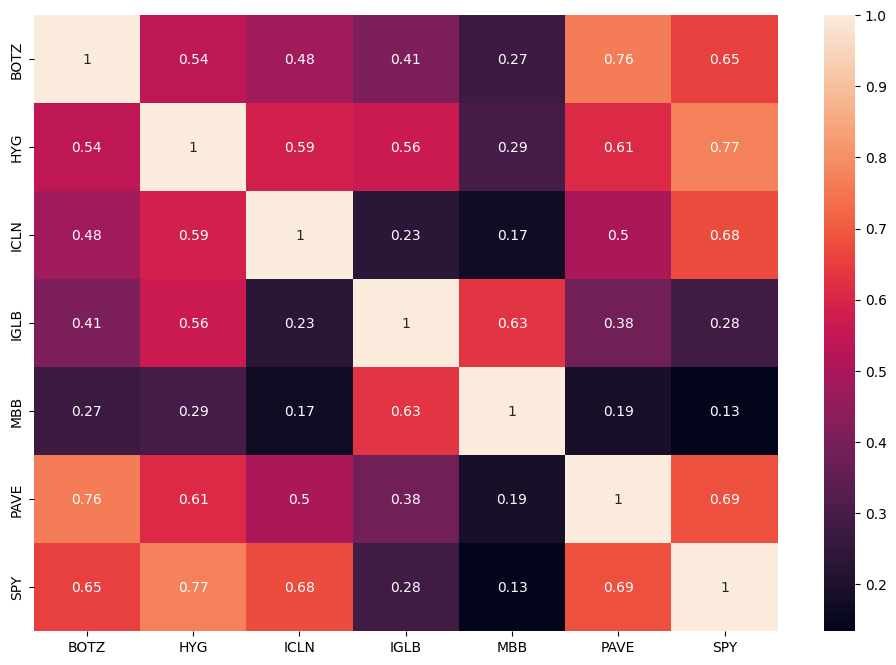

In [9]:
# 전체 기간 상관계수
corr = rets.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [10]:
rets

,BOTZ,HYG,ICLN,IGLB,MBB,PAVE,SPY
Date,,,,,,,
2010-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-17,0.000000,-0.006689,-0.068734,0.009583,0.004880,0.000000,-0.008118
2010-01-24,0.000000,-0.025932,-0.099910,0.000776,0.001961,0.000000,-0.038982
2010-01-31,0.000000,-0.006224,-0.038000,-0.007743,0.001678,0.000000,-0.016666
2010-02-07,0.000000,-0.007210,-0.018711,-0.000195,0.003034,0.000000,-0.006798
...,...,...,...,...,...,...,...
2024-02-25,0.025359,0.005721,-0.057202,0.009305,0.001309,0.018956,0.016696
2024-03-03,0.032867,-0.002198,0.032895,0.002582,0.006028,0.023456,0.009845
2024-03-10,0.020164,0.002850,0.014862,0.012574,0.009450,0.008430,-0.002203


In [11]:
vols

,BOTZ,HYG,ICLN,IGLB,MBB,PAVE,SPY
Date,,,,,,,
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-02-25,0.248910,0.071574,0.267925,0.128076,0.077066,0.202204,0.128715
2024-03-03,0.246336,0.070714,0.265894,0.127805,0.077249,0.199006,0.127960
2024-03-10,0.241040,0.068062,0.265380,0.128036,0.077423,0.183328,0.117538


In [12]:
case = [1,2,3,4,5,6]
prob = [1/6,1/6,1/6,1/6,1/6,1/6]

ex = 0.0
for c, p in zip(case, prob):
    ex = ex + c*p

print(ex)

3.5
